In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Create a new DataFrame without the 'quality' attribute
df2 = df.drop(columns=['quality'])
df2.head()

In [3]:
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
X_wine = df.drop('quality', axis=1)
y_wine = df['quality']

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalize data 
X_wine_standardized = X_wine.copy()
X_wine_standardized = scaler.fit_transform(X_wine)
X_wine_standardized = pd.DataFrame(X_wine_standardized, columns=X_wine.columns)
X_wine_standardized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


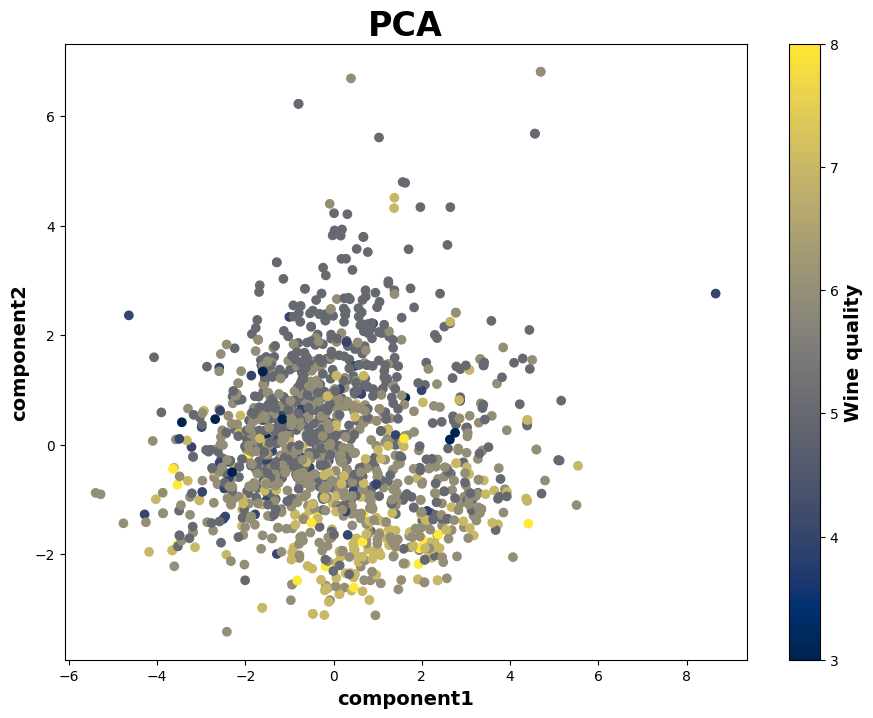

In [15]:
# apply PCA
pca = PCA(n_components=2)
X_wine_pca_standardized = pca.fit_transform(X_wine_standardized)

# plot 
plt.figure(figsize=(11,8))
scatter = plt.scatter(X_wine_pca_standardized[:,0], X_wine_pca_standardized[:,1], c=y_wine, cmap='cividis')#, alpha=0.7)
plt.xlabel('component1', fontweight='bold', fontsize=14)
plt.ylabel('component2', fontweight='bold', fontsize=14)
plt.title('PCA', fontweight='bold', fontsize=24)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Wine quality', fontweight='bold', fontsize=14)
plt.savefig('PCA.svg', format='svg', bbox_inches='tight')

#plt.text(X_wine_pca_standardized[1,1], X_wine_pca_standardized[1,1], 'WINE', fontsize=30)

plt.show()


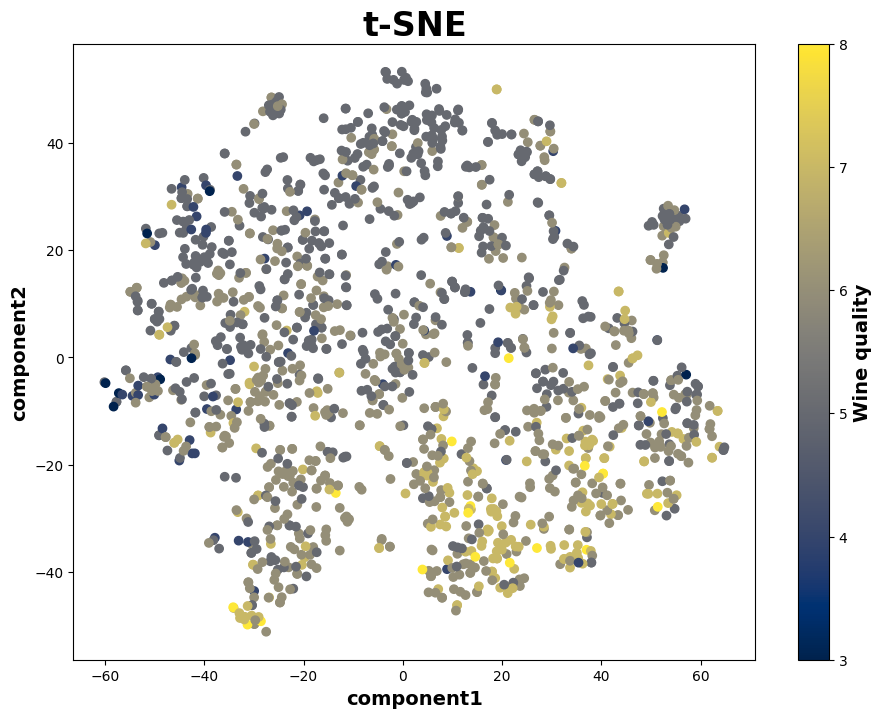

In [16]:
from sklearn.manifold import TSNE
# Create an instance of the TSNE class
tsne = TSNE(n_components=2, random_state=15)

# Apply t-SNE to the data
X_tsne_standardized = tsne.fit_transform(X_wine_standardized)

# plot 
plt.figure(figsize=(11,8))
scatter = plt.scatter(X_tsne_standardized[:,0], X_tsne_standardized[:,1], c=y_wine, cmap='cividis')
plt.xlabel('component1', fontweight='bold', fontsize=14)
plt.ylabel('component2', fontweight='bold', fontsize=14)
plt.title('t-SNE', fontweight='bold', fontsize=24)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Wine quality', fontweight='bold', fontsize=14)
plt.savefig('t_sne.svg', format='svg', bbox_inches='tight')

#plt.text(X_wine_pca_standardized[1,1], X_wine_pca_standardized[1,1], 'WINE', fontsize=30)

plt.show()

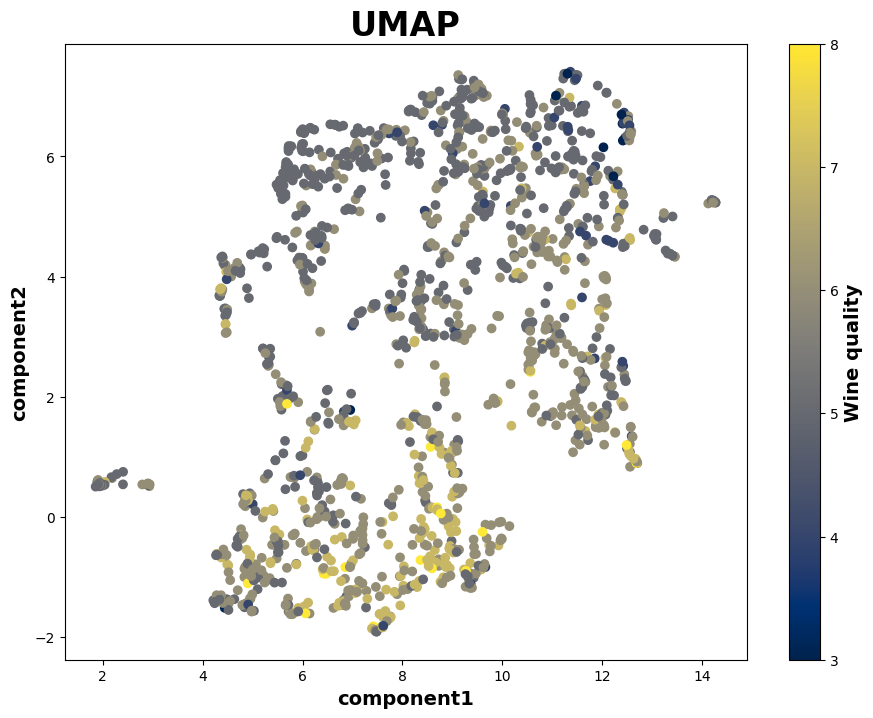

In [17]:
# apply UMAP to the data
import umap
X_umap = umap.UMAP(n_components=2)
X_umap = X_umap.fit_transform(X_wine_standardized)
# plot 
plt.figure(figsize=(11,8))
scatter = plt.scatter(X_umap[:,0], X_umap[:,1], c=y_wine, cmap='cividis') #alpha = 0.7)
plt.xlabel('component1', fontweight='bold', fontsize=14)
plt.ylabel('component2', fontweight='bold', fontsize=14)
plt.title('UMAP', fontweight='bold', fontsize=24)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Wine quality', fontweight='bold', fontsize=14)
plt.savefig('umap.svg', format='svg', bbox_inches='tight')

# plt.text(X_wine_pca_standardized[1,1], X_wine_pca_standardized[1,1], 'WINE', fontsize=30)

plt.show()

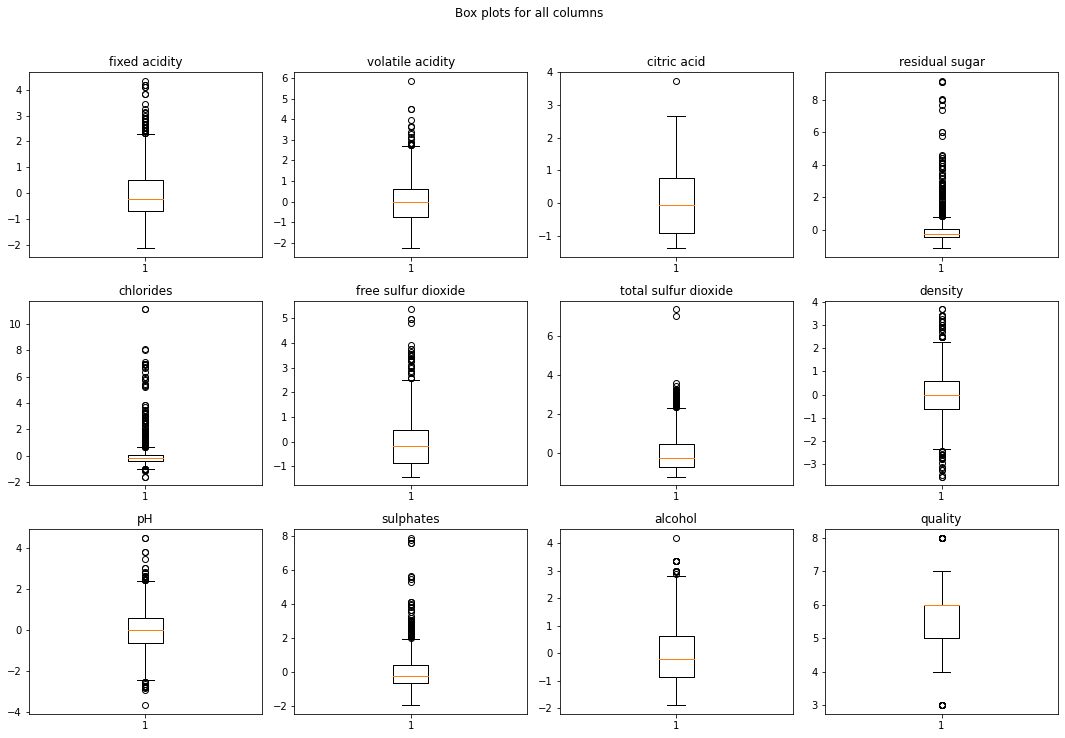

In [10]:

concatenated_df = pd.concat([X_wine_standardized, df[['quality']]], axis=1)
# Get the number of columns
num_cols = len(df.columns)

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Box plots for all columns', y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create box plots for each column
for i, column in enumerate(concatenated_df.columns):
    axes[i].boxplot(concatenated_df[column])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
#H0 = There is a significant relationship between pH levels and wine quality.

import pandas as pd
from scipy.stats import pearsonr

density_data = df['density']
quality_data = df['quality']

# Perform the Pearson correlation test
corr_coefficient, p_value = pearsonr(density_data, quality_data)

# Print the results
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant linear relationship.")
else:
    print("Fail to reject the null hypothesis. No significant linear relationship.")


Pearson Correlation Coefficient: -0.17491922778334834
P-value: 1.8749566520106875e-12
Reject the null hypothesis. There is a significant linear relationship.


### State and explain why you chose a specific test.

I choose Pearson correlation test. 
It is used to determine the linear correlation between pH and Wine quality (Pair-wise relationship).

### What are your conclusions? Report a p-value.

p-value : 0.02096
Conclusion: Since p-value is less than significance level (0.05), we reject the null hypothesis. Hence, there is no significant relationship between pH and Wine quality.

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
df['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])